In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [2]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/All_Friends_data.csv"
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head()

,Unnamed: 0,Speaker,Text,Episode,Scene
0,0,monica,"oh, the way you crushed mike at ping pong was...",1001,"[scene barbados, monica and chandler's room. t..."
1,1,chandler,"you know, i'd love to, but i'm a little tired.",1001,"[scene barbados, monica and chandler's room. t..."
2,2,monica,i'll put a pillowcase over my head.,1001,"[scene barbados, monica and chandler's room. t..."
3,3,chandler,you're on!,1001,"[scene barbados, monica and chandler's room. t..."
4,4,phoebe,hey!,1001,"[scene barbados, monica and chandler's room. t..."


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,Speaker,Text,Episode,Scene
0,monica,"oh, the way you crushed mike at ping pong was...",1001,"[scene barbados, monica and chandler's room. t..."
1,chandler,"you know, i'd love to, but i'm a little tired.",1001,"[scene barbados, monica and chandler's room. t..."
2,monica,i'll put a pillowcase over my head.,1001,"[scene barbados, monica and chandler's room. t..."
3,chandler,you're on!,1001,"[scene barbados, monica and chandler's room. t..."
4,phoebe,hey!,1001,"[scene barbados, monica and chandler's room. t..."


In [6]:
FreqDist(df["Speaker"]).most_common(10)

[('ross', 9145),
 ('rachel', 9124),
 ('chandler', 8367),
 ('monica', 8283),
 ('joey', 8200),
 ('phoebe', 7355),
 ('mike', 363),
 ('all', 326),
 ('richard', 254),
 ('mr. geller', 229)]

In [7]:
#Create list with characters. Remove ()
characters = []
for i in df.Speaker.unique():
    k=re.sub(r'\([^)]*\)','',i)
    characters.append(k)

In [9]:
#joey = joe, rachel = rach, monica = mon, phoebe = phoebs = phoeb
mainch = ["joe","rach","ross","chandler","mon","phoeb"]

In [10]:
# function for clearing lines
def cleanLines(line):
    #Exclude links
    line = re.sub(r'\([^)]*\)','',line)
    #Remove everything besides letters
    line = re.sub("([^a-z \t])|(\w+:\/\/\S+)", "", line)
    #Create a string for tweet
    line = [''.join(s for s in line)]
    return(line) 

In [11]:
#Create list for what characters says. allsays[0] is what joey says, allsays[5] is phoebe
allsays = list()
for character in mainch:
    says = df.Text[df['Speaker'].str.match(character)].reset_index(drop=True)
    sayscont = list()
    for i in range(len(says)):
        sayscont.extend(cleanLines(says[i]))
    allsays.append(sayscont)

In [12]:
len(allsays)

6

In [13]:
#Add words to stopwords
stopWords = nltk.corpus.stopwords.words('english')
newStopWords = ["like","get","yeah","know","gonna","hey","uh","oh","well","okay","im","dont","youre","thats","got"]
stopWords.extend(newStopWords)


In [14]:
len(allsays[0])

8321

We can see that Joey in the FreqDist fuction has 8200 lines but in the created list, he has 8321. One of the reasons for this is that there is characters such as "Joey's co-star" who has 10 lines, that gets mistaken for Joey in our code. Furthermore Joey has lines together with other characters that also gets attached to his lines

In [15]:
#Create list for all words
allwords = list()

#Create list for character
joeysays = []
for i in range(len(allsays[0])):
    words = [w for w in allsays[0][i].split() if w not in stopWords]
    joeysays.extend(words)

allwords.extend(joeysays)

In [16]:
n = 1
rachelsays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    rachelsays.extend(words)
allwords.extend(rachelsays)

n+=1
rosssays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    rosssays.extend(words)
allwords.extend(rosssays)
    
n+=1
chandlersays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    chandlersays.extend(words)
allwords.extend(chandlersays)

n+=1
monicasays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    monicasays.extend(words)
allwords.extend(monicasays)

n+=1
phoebesays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    phoebesays.extend(words)
allwords.extend(phoebesays)


In [17]:
print("Most frequent words for Joey",FreqDist(joeysays).most_common(10))
longWords = []
for i in range(len(joeysays)):
    longWords.extend([w for w in joeysays[i].split() if len(w) > 14])
print("Long words that Joey says",sorted(longWords))

Most frequent words for Joey [('right', 662), ('look', 379), ('go', 334), ('one', 317), ('ross', 313), ('really', 300), ('think', 298), ('good', 278), ('come', 278), ('yknow', 274)]
Long words that Joey says ['andandandandand', 'andandandandandand', 'andreaangelaandrea', 'chicagosoundtrack', 'closenessshmoshness', 'commitmentminded', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'greatgreatgranddaughter', 'greatgreatgranddaughter', 'greatgreatgranddaughter', 'hmmmmmmmmmmmmmm', 'iforgottenstates', 'knucklecracking', 'looklooklooklook', 'looklooklooklooklook', 'looklooklooklooklook', 'misunderstanding', 'monicamonicamonicamonica', 'nononononononono', 'phlegmphlegmphlegm', 'pigintheblanket', 'responsibilities', 'rossrossrossross', 'seventeenfourteen', 'suddenlysuddenly', 'superintendents', 'superintendents', 'thatthatbananameat', 'uncomprehending', 'waitwaitwaitwait', 'waitwaitwaitwai

In [18]:
theysay = rachelsays
print("Most frequent words for Rachel",FreqDist(theysay).most_common(10))
longWords = []
for i in range(len(theysay)):
    longWords.extend([w for w in theysay[i].split() if len(w) > 14])
print("Long words that Rachel says",sorted(longWords))

Most frequent words for Rachel [('right', 553), ('ross', 536), ('god', 473), ('yknow', 451), ('really', 450), ('mean', 424), ('think', 373), ('go', 365), ('hi', 364), ('joey', 330)]
Long words that Rachel says ['anastassakispapasifakis', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulatioooons', 'embarrassingbut', 'everylittlething', 'fashionimpaired', 'goooooooddddddd', 'heywhoawhoawhoa', 'ifoundoutiwasgonnahaveemma', 'imovedtonewyork', 'kickyouinthecrotch', 'kiddingseriously', 'kittykittykitty', 'kittykittykittykitty', 'looklooklooklooklook', 'misunderstanding', 'multifunctional', 'okayokayokayokayokayokayokay', 'palaeontologist', 'responsibilities', 'rockpaperscissors', 'rockpaperscissors', 'seriouslyseriously', 'seriousserserseriously', 'sicksicksicksick', 'somemeaningless', 'thatsyknowthatsweve', 'theyretheyretheyre', 'transponcetranspondster', 'tra

In [19]:
theysay = rosssays
print("Most frequent words for Ross",FreqDist(theysay).most_common(10))
longWords = []
for i in range(len(theysay)):
    longWords.extend([w for w in theysay[i].split() if len(w) > 14])
print("Long words that Ross says",sorted(longWords))

Most frequent words for Ross [('right', 510), ('mean', 391), ('go', 391), ('think', 356), ('really', 350), ('look', 345), ('yknow', 300), ('see', 292), ('come', 292), ('want', 284)]
Long words that Ross says ['ahhhhhhhhhhhhhh', 'anthropologically', 'anthropologists', 'antidepressants', 'apartmentalthough', 'australopithicus', 'australopithicus', 'bahbahbhabhannn', 'bitemebitemebitemebiteme', 'boscodictiasaur', 'condescendingly', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'electromagnetic', 'feesensenstenlger', 'friendphyllistake', 'gellerwillickbunch', 'interdepartmental', 'lalalalalalalalalala', 'maybekindawanted', 'mboscodictiosaur', 'minimarshmallow', 'mississippilesly', 'misunderstanding', 'mwwwooooohahhah', 'paleontological', 'paleontologists', 'paleontologists', 'paleontologists', 'rememberremember', 'shushshushshhst', 'surprisedgoodbye', 'thatsthatsthats', 'turnedtwentyeight', 'uheveryonethisis', 'uhhhhhhthatthat', 'ummclickclocken', 'whatswhatsw

In [20]:
theysay = phoebesays
print("Most frequent words for Phoebe",FreqDist(theysay).most_common(10))
longWords = []
for i in range(len(theysay)):
    longWords.extend([w for w in theysay[i].split() if len(w) > 14])
print("Long words that Phoebe says",sorted(longWords))

Most frequent words for Phoebe [('right', 404), ('really', 366), ('yknow', 342), ('go', 295), ('ok', 288), ('one', 281), ('god', 276), ('think', 252), ('good', 246), ('look', 234)]
Long words that Phoebe says ['abouteverything', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'headacheheadache', 'icknecktreeanis', 'interchangeable', 'internationally', 'lightningbearer', 'maintenanceokay', 'massageyourselfathomeworkshop', 'mustardtastrophe', 'needlessturkeymurder', 'paleonthologist', 'paleontologists', 'phoebephoebephoebephoebeburrrrr', 'playingformoney', 'thanksforalovelyevening', 'themnotlikingyouextravaganza', 'thirtysomething', 'threedimensional', 'unpredictability', 'waitwaitwaitwait', 'whatwhatwhatwhatwhat', 'yellowbelliedlillylivereddraw', 'youreyoureyoure']


In [21]:
FreqDist(df["Scene"]).most_common(10)

[(nan, 434),
 ('[scene central perk]', 393),
 ("[scene monica and rachel's, continued from earlier.]", 280),
 ("[scene at chandler and joey's. ross and chandler are there. ross is watching wrestling.]",
  279),
 ('[scene monica and chandlers apartment.]', 266),
 ("[scene at monica and rachel's.]", 226),
 ("[scene monica and rachel's apartment. monica and ross are standing in the kitchen. ross is filling out a check]",
  164),
 ("[scene monica and chandler's, the halloween party has started. monica is setting out some food as rachel enters.]",
  162),
 ('[scene monica’s apartment. monica is cleaning with a vacuum and then she cleans it with a dust buster. the guys enter the room.]',
  159),
 ("[scene monica and rachel's, continued from earlier]", 156)]

# Sentiment

In [22]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/Data_Set_S1.csv"
s1 = pd.read_csv(url, sep='\t')
s1.head(5)

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


In [23]:
# Sentiment dictonary:
sentiments = dict(zip(s1.word,s1.happiness_average))

In [24]:
# Function that calculates sentiment given a list of tokens
def sentiment_func(token_list):
    res = []
    for word in token_list:
        if word in s1.word.values:
            res.append(sentiments[word.lower()])
        
    return sum(res)/len(res) if len(res) else 0

In [25]:
#Sentiment for Joey
joeysent = []
for line in allsays[0]:
    joeysent.append(sentiment_func(line))

In [26]:
#Clear out 0 instances
joeySent = [i for i in joeysent if i > 0]

C:\Users\thork\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


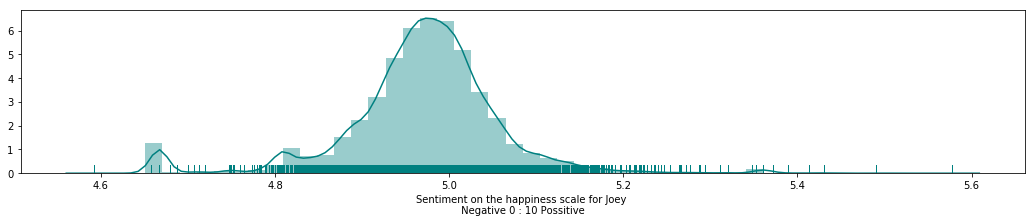

In [27]:
import seaborn as sns
plt.figure(figsize = (18, 3))
sns.distplot(joeySent, color = 'teal', axlabel ="Sentiment on the happiness scale for Joey \n Negative 0 : 10 Possitive ", rug = True)

plt.show()

In [29]:
#Sentiment for Rachel
n = 1
racsent = []
for line in allsays[n]:
    racsent.append(sentiment_func(line))

#Sentiment for Ross
n +=1
rosssent = []
for line in allsays[n]:
    rosssent.append(sentiment_func(line))
    
#Sentiment for Chandler
n +=1
chasent = []
for line in allsays[n]:
    chasent.append(sentiment_func(line))
    
#Sentiment for Monica
n +=1
monsent = []
for line in allsays[n]:
    monsent.append(sentiment_func(line))
    
#Sentiment for Phoebe
n +=1
phosent = []
for line in allsays[n]:
    phosent.append(sentiment_func(line))


In [31]:
#Clear out 0 instances
racSent = [i for i in racsent if i > 0]
rossSent = [i for i in rosssent if i > 0]
chaSent = [i for i in chasent if i > 0]
monSent = [i for i in monsent if i > 0]
phoSent = [i for i in phosent if i > 0]

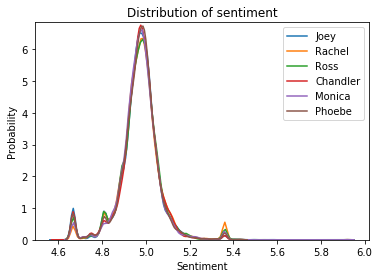

In [34]:
# Distribution plot:
sns.kdeplot(joeySent, label="Joey")
sns.kdeplot(racSent, label="Rachel")
sns.kdeplot(rossSent, label="Ross")
sns.kdeplot(chaSent, label="Chandler")
sns.kdeplot(monSent, label="Monica")
sns.kdeplot(phoSent, label="Phoebe")
plt.legend();
plt.xlabel('Sentiment');
plt.ylabel('Probability');
plt.title('Distribution of sentiment');
plt.show()

In [38]:
print("Max",max(joeySent),"Min",min(joeySent))
print("Max",max(racSent),"Min",min(racSent))
print("Max",max(rossSent),"Min",min(rossSent))
print("Max",max(chaSent),"Min",min(chaSent))
print("Max",max(monSent),"Min",min(monSent))
print("Max",max(phoSent),"Min",min(phoSent))

Max 5.57714285714 Min 4.592
Max 5.92 Min 4.66666666667
Max 5.92 Min 4.64888888889
Max 5.43 Min 4.6
Max 5.92 Min 4.66
Max 5.43 Min 4.66666666667


In [82]:
posSent = [value == max(monSent) for value in monsent]

In [83]:
negSent = [value == min(joeySent) for value in joeysent]

In [86]:
#Most negative line
for i in range(len(negSent)):
    if negSent[i]:
        print(allsays[0][i]) 

 heyyy 


In [85]:
#Most positive line
for i in range(len(negSent)):
    if negSent[i]:
        print(allsays[4][i]) 

 i lost our mattresses
